## Problem Statement :  Train a neural network model to classify images of clothing, like sneakers and shirts.

### Backpropagation in Neural Networks Using Keras — Classification Example


In [1]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.17.0


### Import the Fashion MNIST dataset
We are using  the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels).We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow, just import and load the data.

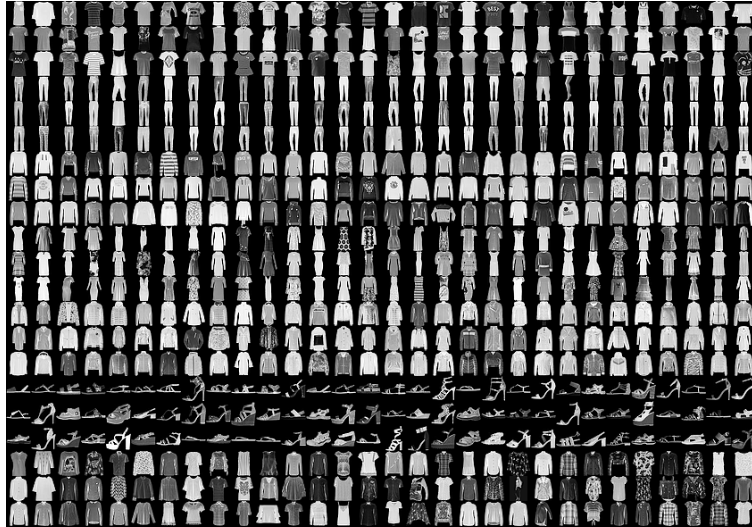

Link for dataset : https://www.tensorflow.org/tutorials/keras/basic_classification#import_the_fashion_mnist_dataset

In [2]:
## Loading Data Set
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Loading the dataset returns four NumPy arrays:

- The train_images and train_labels arrays are the training set—the data the model uses to learn.
- The model is tested against the test set, the test_images, and test_labels arrays.
- The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents.
- Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images.

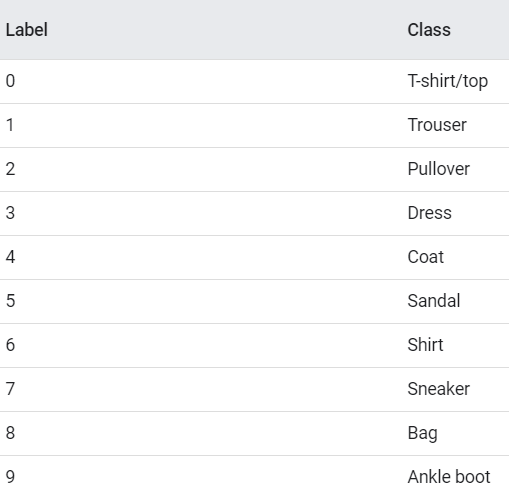

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels.

In [4]:
train_images.shape #

(60000, 28, 28)

- There are 60,000 Labels in the dataset

In [5]:
len(train_labels)

[9 0 0 ... 3 0 5]


In [6]:
print(train_labels)

[9 0 0 ... 3 0 5]


- Each label is an integer between 0 and 9

In [7]:
test_images.shape

(10000, 28, 28)

## Preprocess the data
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255.

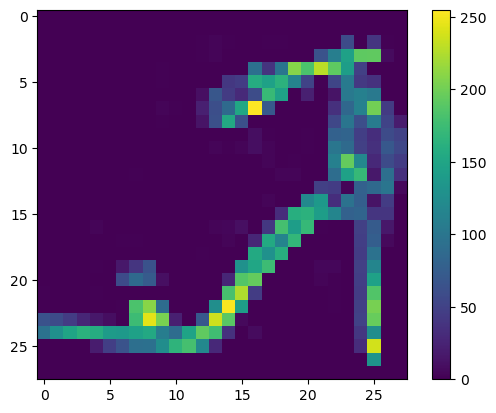

In [11]:
plt.figure()
plt.imshow(train_images[8])
plt.colorbar()
plt.grid(False)
plt.show()

- We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the training set and the testing set are preprocessed in the same way

##### Why Use train_images = train_images / 255.0 and test_images = test_images / 255.0?
- This step is called normalization (or feature scaling) and is crucial for improving model performance. Here's why it's important:

- 1. Pixel Value Scaling
In image datasets like MNIST, pixel values range from 0 to 255 (since they are 8-bit grayscale images).
Dividing by 255.0 scales these values to the range 0 to 1.
Example:

Original pixel value = 100
After normalization = 100 / 255 = 0.392
### Why Normalize?
- Improves Model Stability: Neural networks perform better when input values are within a small, consistent range. Scaling to [0, 1] helps gradients flow more smoothly during backpropagation.

- Faster Convergence: Normalization accelerates the learning process, improving training efficiency.

 - Reduces Numerical Instability: Very large or very small values can lead to unstable gradients. Scaling mitigates this risk.

- Consistency Between Training and Testing Data
Normalizing both train_images and test_images ensures the model generalizes well to unseen data.
Skipping normalization could cause the model to interpret the values incorrectly, especially when different scales are involved.
- Practical Insight
Modern activation functions like ReLU, Sigmoid, and Softmax work optimally when inputs are within a small range.
Without scaling, large input values may push the neurons into saturation zones, reducing the network’s learning capacity.

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

- Display the first 25 images from the training set and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

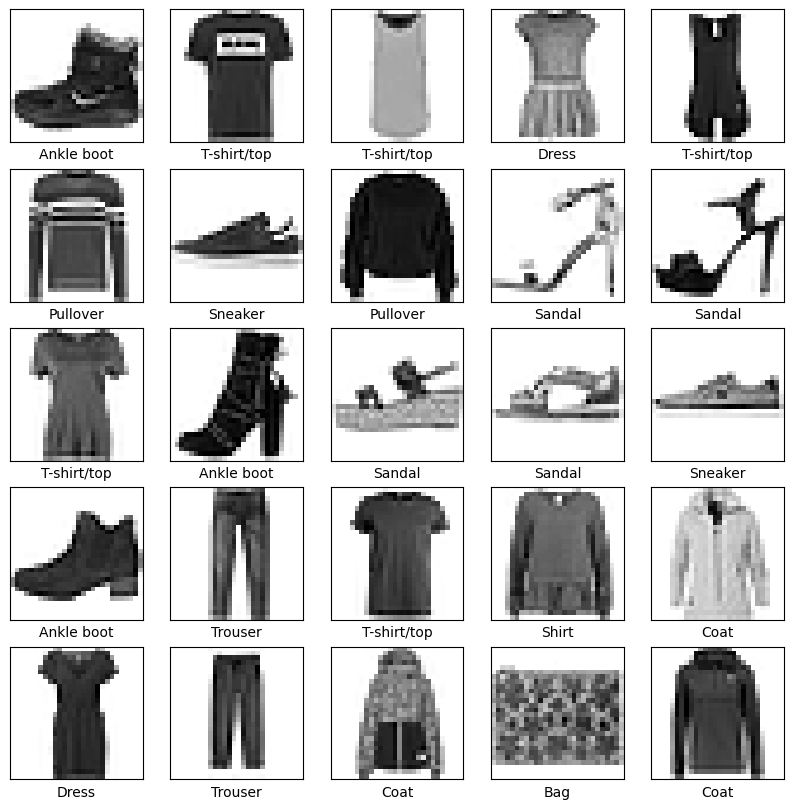

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Number of Hidden layers:
- between the size of input layers and outputs.
- nodes should not be less than passed input layers. 

### Build the model
Building the neural network requires configuring the layers of the model, then compiling the model.
#### Setup the layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. And, hopefully, these representations are more meaningful for the problem at hand.
Most of deep learning consists of chaining together simple layers. Most layers, like tf.keras.layers.Dense, have parameters that are learned during training.

### Flatten():  is designed for TensorFlow/Keras pipelines, making the code cleaner and reducing the need for manual reshaping.
- This layer reshapes the 2D input (28x28 image) into a 1D array (size 784) without changing the data values.
- input_shape=(28, 28): Specifies the input size for the model — typically for datasets like MNIST, where each image is 28x28 pixels.

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

C:\Users\Suyashi144893\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


- The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

- After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

### Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

- **Loss function** —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
- **Optimizer** —This is how the model is updated based on the data it sees and its loss function.
- **Metrics** —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [15]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model
Training the neural network model requires the following steps:

- Feed the training data to the model—in this example, the train_images and train_labels arrays.
- The model learns to associate images and labels.
- We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.
- To start training, call the model.fit method—the model is "fit" to the training data

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7804 - loss: 0.6317
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8637 - loss: 0.3783
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8748 - loss: 0.3430
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8851 - loss: 0.3119
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8923 - loss: 0.2930
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8983 - loss: 0.2740
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9010 - loss: 0.2680
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9056 - loss: 0.2538
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9082 - loss: 0.2462
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9112 - loss: 0.2375


### As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.90 (or 90%) on the training data.

### Evaluate accuracy
Next, compare how the model performs on the test dataset:

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8768 - loss: 0.3490
Test accuracy: 0.8779000043869019


#### It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of overfitting. Overfitting is when a machine learning model performs worse on new data than on their training data.

### Make predictions
With the model trained, we can use it to make predictions about some images.

In [18]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


- Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction

In [19]:
predictions[1]

array([1.1935564e-04, 8.4310542e-14, 9.9791116e-01, 6.0353458e-12,
       1.5212293e-03, 1.1240113e-09, 4.4826520e-04, 3.4688365e-12,
       7.9579702e-12, 1.4369975e-15], dtype=float32)

- A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value

In [20]:
np.argmax(predictions[1])

2

- So the model is most confident that this image is an ankle boot, or class_names[9]. And we can check the test label to see this is correct:

### We can graph this to look at the full set of 10 channels

In [21]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

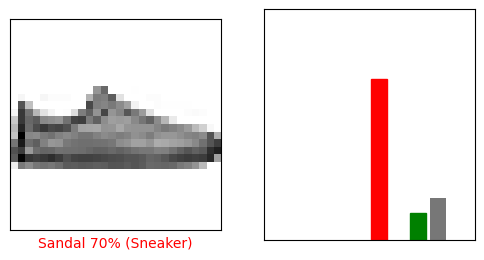

In [22]:
## Let's look at the 0th image, predictions, and prediction array.
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

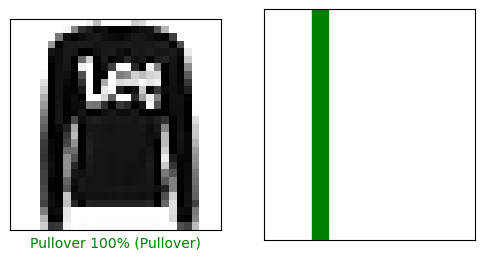

In [23]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

### Let's plot several images with their predictions. Correct prediction labels are green and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident.

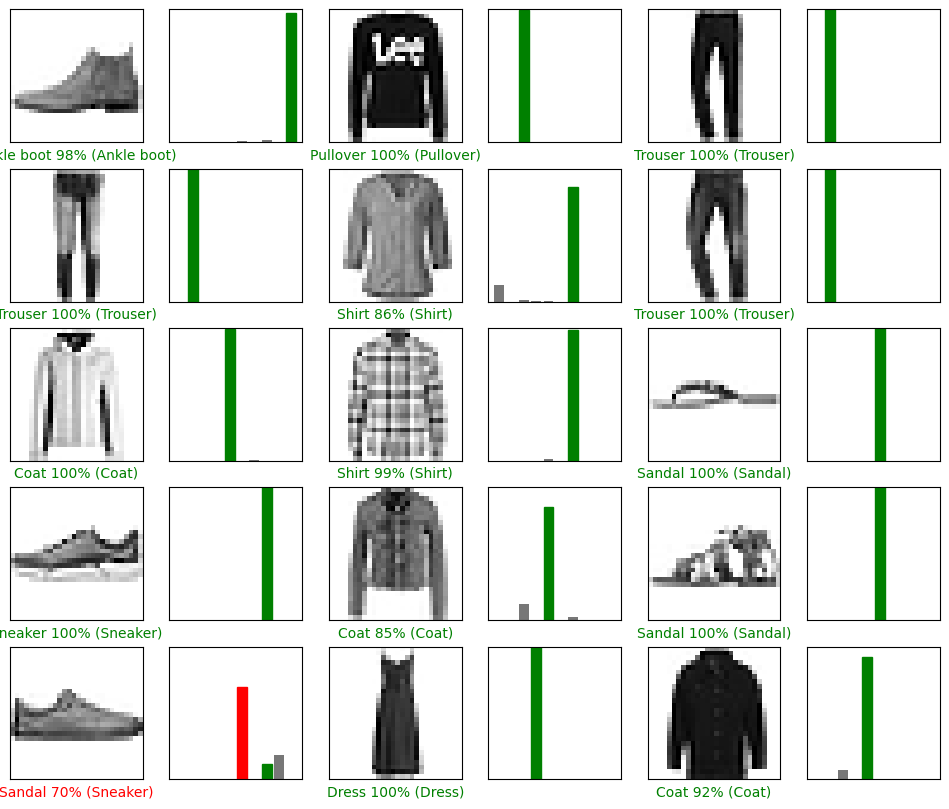

In [24]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [25]:
## Finally, use the trained model to make a prediction about a single image.

# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


- tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [26]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[[2.2177153e-07 1.7953168e-07 2.1482530e-08 1.5915601e-08 9.6140006e-08
  1.0159555e-02 3.7302569e-05 1.2866931e-02 3.4491666e-05 9.7690111e-01]]


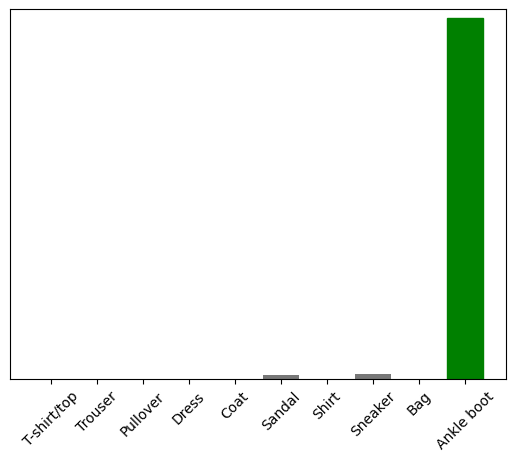

In [30]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

- model.predict returns a list of lists, one for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [ ]:
np.argmax(predictions_single[0])

### Train the Model (Backpropagation Happens Here)

In [31]:
history = model.fit(
    train_images, train_labels,
    epochs=10,                     # Number of iterations through the dataset
    batch_size=32,                 # Number of samples per batch
    validation_split=0.2           # Reserve 20% data for validation
)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9136 - loss: 0.2299 - val_accuracy: 0.9071 - val_loss: 0.2509
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9171 - loss: 0.2212 - val_accuracy: 0.9132 - val_loss: 0.2353
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9224 - loss: 0.2088 - val_accuracy: 0.9028 - val_loss: 0.2642
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9235 - loss: 0.2026 - val_accuracy: 0.9097 - val_loss: 0.2429
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9276 - loss: 0.1942 - val_accuracy: 0.9058 - val_loss: 0.2590
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9294 - loss: 0.1910 - val_accuracy: 0.9068 - val_loss: 0.2496
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9296 - loss: 0.1868 - val_accuracy: 0.9096 - val_loss: 0.2498
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9309 - loss: 0.1854 - 

In [32]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8815 - loss: 0.3805
Test accuracy: 88.20%


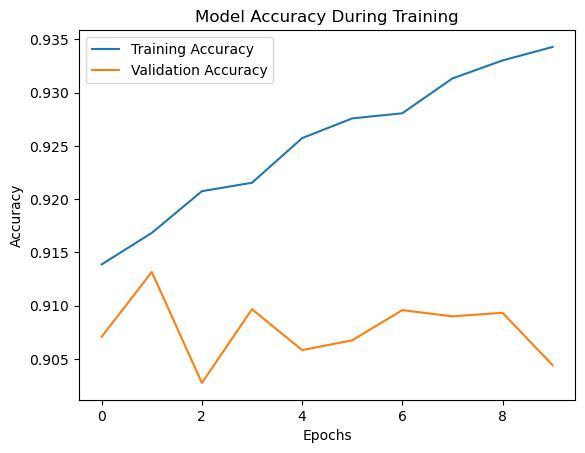

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### Key Takeaways on Backpropagation in This Example
- ✅ Forward pass computes predictions.
- ✅ Loss is calculated to measure prediction error.
- ✅ Backpropagation computes gradients and adjusts weights.
- ✅ Adam optimizer efficiently updates weights to minimize the loss.
- ✅ With each epoch, accuracy improves as backpropagation optimizes the network.